In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import TargetEncoder
from scipy.stats import norm
from scipy.stats import probplot
from missforest.missforest import MissForest
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, r_regression

In [2]:
#1.) import data
df = pd.read_csv("Salary_Data.csv")

print(df.size)
df.head()

40224


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [4]:
#clean data
df.isnull().sum()

#if target is null drop row
df = df[df['Salary'].notna()]

print(df[df.isna().any(axis=1)])

       Age Gender Education Level  Job Title  Years of Experience    Salary
2011  27.0   Male             NaN  Developer                  7.0  100000.0


In [5]:
for col in df.select_dtypes("object").columns.tolist():
    print(df[col].unique())
    
df = df.replace(to_replace="Master's",
           value="Master's Degree")

df = df.replace(to_replace="Bachelor's",
           value="Bachelor's Degree")

df = df.replace(to_replace="phD",
           value="PhD")

for col in df.select_dtypes("object").columns.tolist():
    print(df[col].unique())

['Male' 'Female' 'Other']
["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree" nan
 'High School' 'phD']
['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing

In [6]:
#train and testing split before EDA
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1])

In [7]:
#2.) EDA
x_train.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Age,5024.0,33.66,7.64,21.0,28.0,32.0,38.0,62.0
Years of Experience,5024.0,8.13,6.08,0.0,3.0,7.0,12.0,34.0


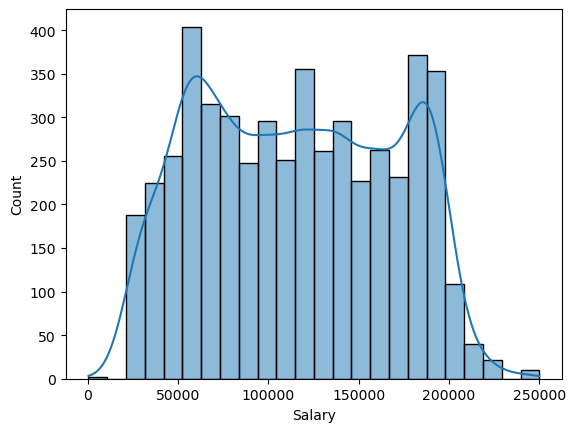

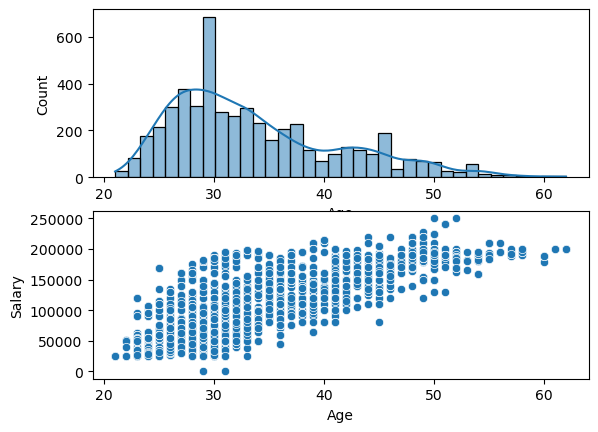

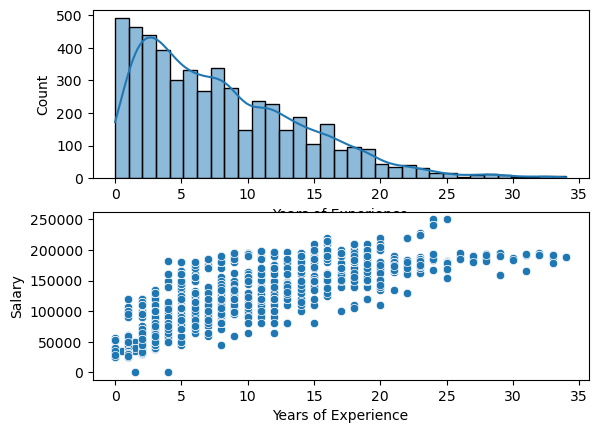

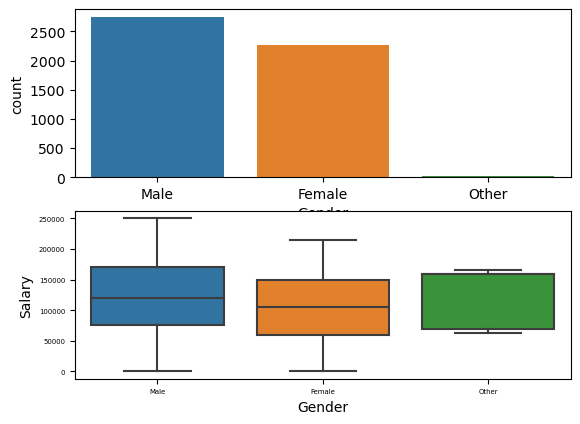

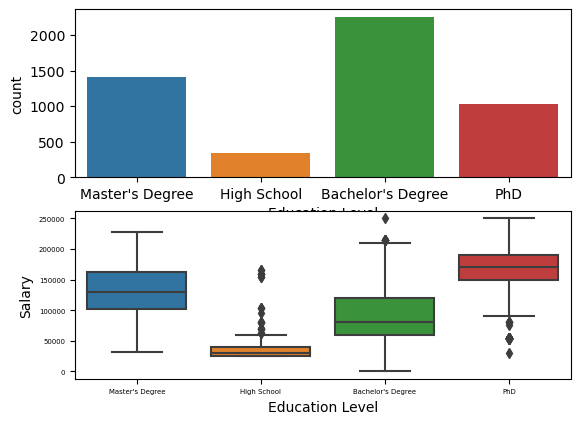

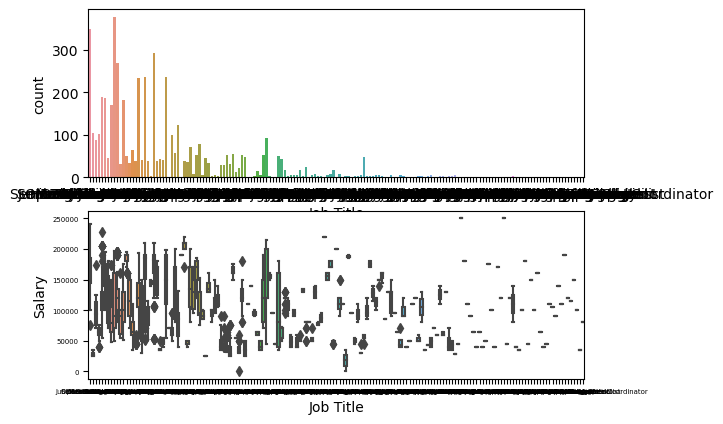

<Axes: xlabel='Gender', ylabel='Salary'>

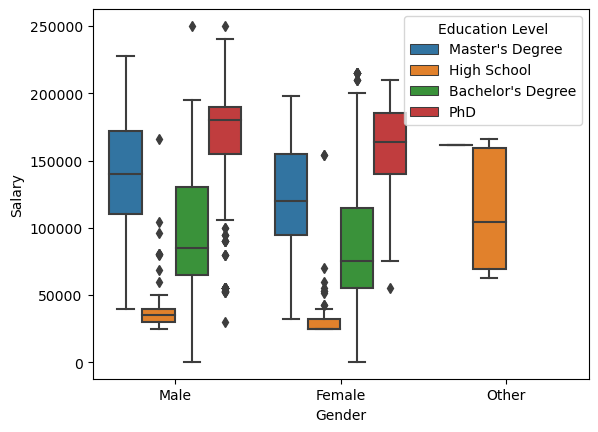

In [8]:
float_cols = x_train.select_dtypes("float64").columns.tolist()
object_cols = x_train.select_dtypes("object").columns.tolist()


#sns.histplot(x="Salary",data=y_train, kde=True)
sns.histplot(x=y_train,kde=True)

for col in float_cols:
    fig, ax = plt.subplots(2,1)
    sns.histplot(x=col,data=x_train, kde=True, ax=ax[0])
    sns.scatterplot(x=col, y=y_train, data=x_train, ax=ax[1])
    plt.show()
    
for col in object_cols:
    fig, ax = plt.subplots(2,1)
    
    sns.countplot(data=x_train, x=col, ax=ax[0])
    sns.boxplot(data=x_train, x=col, y=y_train,  ax=ax[1])
    plt.tick_params(axis='both', which='major', labelsize=5)
    plt.show()

sns.boxplot(data=x_train, x="Gender", y=y_train, hue="Education Level") 

In [9]:
#3.) Impute Missing Values/Standardize/Scale

#impute missing values 


#df_miss_forest = df.copy()

mf = MissForest()

x_train[["Gender", "Education Level", "Job Title"]] = x_train[["Gender", "Education Level", "Job Title"]].astype('category')
x_test[["Gender", "Education Level", "Job Title"]] = x_test[["Gender", "Education Level", "Job Title"]].astype('category')


mf.fit(x=x_train, categorical=["Gender", "Education Level", "Job Title"])



if x_train.isnull().sum().sum() != 0:
    x_train = mf.transform(x=x_train)
if x_test.isnull().sum().sum() != 0:
    x_test = mf.transform(x=x_test)

print(x_train[df.isna().any(axis=1)])
print(x_test[df.isna().any(axis=1)])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 187
[LightGBM] [Info] Number of data points in the train set: 5023, number of used features: 4
[LightGBM] [Info] Start training from score -1.269020
[LightGBM] [Info] Start training from score -2.707652
[LightGBM] [Info] Start training from score -0.802209
[LightGBM] [Info] Start training from score -1.590311
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 187
[LightGBM] [Info] Number of data points in the train set: 5023, number of used features: 4
[LightGBM] [Info] Start training from score -1.26902

C:\Users\egrah\AppData\Local\Temp\ipykernel_21972\166407693.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(x_train[df.isna().any(axis=1)])
C:\Users\egrah\AppData\Local\Temp\ipykernel_21972\166407693.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(x_test[df.isna().any(axis=1)])


In [10]:
x_train[["Gender", "Education Level", "Job Title"]] = x_train[["Gender", "Education Level", "Job Title"]].astype('object')
x_test[["Gender", "Education Level", "Job Title"]] = x_test[["Gender", "Education Level", "Job Title"]].astype('object')

In [11]:
#encode features with high cardinality 

#sklearn target encoder includes kfold target encoding with parmeter set to cv=5
#low smooth value places emphasis on target mean instead of global mean for more variance in encoded values

#create copies of data before replacing columns feature engineered features
x_train_encoded = x_train.copy()
x_test_encoded = x_test.copy()

encoder = TargetEncoder(smooth=1000, target_type='continuous')

x_train_encoded["Job Title"] = encoder.fit_transform(x_train_encoded[["Job Title"]], y_train)
x_test_encoded["Job Title"] = encoder.transform(x_test_encoded[["Job Title"]])

x_train_encoded.head()
x_test_encoded.head()

,Age,Gender,Education Level,Job Title,Years of Experience
1014,29.0,Female,Master's Degree,128652.110640,6.0
1332,43.0,Male,Master's Degree,124929.542715,12.0
2300,42.0,Male,Master's Degree,120430.524092,14.0
3731,29.0,Female,High School,107128.465325,1.0
677,27.0,Female,Master's Degree,128652.110640,4.0


In [12]:
#one hot encode the rest of categorical features 


enc = OneHotEncoder(handle_unknown = 'ignore', drop="first", sparse_output=False)

train_encoded = enc.fit_transform(x_train_encoded[["Gender", "Education Level"]])
test_encoded = enc.transform(x_test_encoded[["Gender", "Education Level"]])

print(x_train_encoded)

       Age  Gender    Education Level      Job Title  Years of Experience
601   31.0    Male    Master's Degree  126006.965534                  9.0
3716  29.0  Female        High School  108765.585460                  1.0
3995  33.0    Male  Bachelor's Degree  114231.841890                  7.0
5620  28.0  Female  Bachelor's Degree  111639.518307                  3.0
4514  32.0  Female    Master's Degree  115401.171870                  6.0
...    ...     ...                ...            ...                  ...
3865  38.0  Female    Master's Degree  115661.166032                 10.0
1137  26.0  Female  Bachelor's Degree  117382.875034                  3.0
3167  36.0    Male                PhD  116428.903587                 12.0
4745  33.0    Male    Master's Degree  116557.400360                  8.0
656   25.0  Female  Bachelor's Degree  117044.108275                  2.0

[5024 rows x 5 columns]


In [13]:
#concat encoded dataframes and original dataframes

x_train_encoded = pd.concat([x_train_encoded.reset_index(drop=True), pd.DataFrame(train_encoded, columns=enc.get_feature_names_out(["Gender", "Education Level"])).reset_index(drop=True)], axis=1)
x_test_encoded = pd.concat([x_test_encoded.reset_index(drop=True), pd.DataFrame(test_encoded, columns=enc.get_feature_names_out(["Gender", "Education Level"])).reset_index(drop=True)], axis=1)


x_train_encoded.drop(columns=["Gender", "Education Level"], axis=1, inplace=True)
x_test_encoded.drop(columns=["Gender", "Education Level"], axis=1, inplace=True)

print(x_train_encoded)
print(x_test_encoded)

       Age      Job Title  Years of Experience  Gender_Male  Gender_Other  \
0     31.0  126006.965534                  9.0          1.0           0.0   
1     29.0  108765.585460                  1.0          0.0           0.0   
2     33.0  114231.841890                  7.0          1.0           0.0   
3     28.0  111639.518307                  3.0          0.0           0.0   
4     32.0  115401.171870                  6.0          0.0           0.0   
...    ...            ...                  ...          ...           ...   
5019  38.0  115661.166032                 10.0          0.0           0.0   
5020  26.0  117382.875034                  3.0          0.0           0.0   
5021  36.0  116428.903587                 12.0          1.0           0.0   
5022  33.0  116557.400360                  8.0          1.0           0.0   
5023  25.0  117044.108275                  2.0          0.0           0.0   

      Education Level_High School  Education Level_Master's Degree  \
0    

In [14]:
#test for multicollinearity in features using vif and pearsons correlation coefficent


vif = pd.DataFrame()

vif["Variable"] = x_train_encoded.columns

print(x_train_encoded.dtypes)

vif["Scores"] = [variance_inflation_factor(x_train_encoded.values, i) for i in range(x_train_encoded.shape[1])]

print(vif.head(8))

#correlation matrix 
x_train_encoded.corr()

#considerable correlation wioth features Age, Job Title and Years of Experiance with each other

Age                                float64
Job Title                          float64
Years of Experience                float64
Gender_Male                        float64
Gender_Other                       float64
Education Level_High School        float64
Education Level_Master's Degree    float64
Education Level_PhD                float64
dtype: object
                          Variable      Scores
0                              Age  157.749202
1                        Job Title   83.802159
2              Years of Experience   21.546442
3                      Gender_Male    2.327620
4                     Gender_Other    1.055326
5      Education Level_High School    1.232909
6  Education Level_Master's Degree    1.919998
7              Education Level_PhD    2.093240


,Age,Job Title,Years of Experience,Gender_Male,Gender_Other,Education Level_High School,Education Level_Master's Degree,Education Level_PhD
Age,1.000000,0.513218,0.937344,0.113242,0.032536,-0.235543,0.128836,0.492894
Job Title,0.513218,1.000000,0.545917,0.099156,0.002004,-0.280830,0.094319,0.535657
Years of Experience,0.937344,0.545917,1.000000,0.093465,0.060178,-0.271813,0.161491,0.481065
Gender_Male,0.113242,0.099156,0.093465,1.000000,-0.055877,-0.068864,-0.155827,0.099953
Gender_Other,0.032536,0.002004,0.060178,-0.055877,1.000000,0.159147,-0.014414,-0.025771
Education Level_High School,-0.235543,-0.280830,-0.271813,-0.068864,0.159147,1.000000,-0.167119,-0.135239
Education Level_Master's Degree,0.128836,0.094319,0.161491,-0.155827,-0.014414,-0.167119,1.000000,-0.316347
Education Level_PhD,0.492894,0.535657,0.481065,0.099953,-0.025771,-0.135239,-0.316347,1.000000


In [15]:
#Train Baseline Model


#reset index on ytrain to match index on xtrain data
y_train.reset_index(drop = True, inplace=True)

#sklearn model
#model = LinearRegression().fit(x_train, y_train)

#model from statsmodels.api
model = sm.OLS(y_train, sm.add_constant(x_train_encoded)).fit()

In [16]:
#Model Evaluation
scores = dict()

#insert a column for the intercept coef so statsmodels can compute the dot product
x_test_encoded.insert(loc=0, column='const', value=1)

y_preds = model.predict(exog=x_test_encoded)

scores["Baseline"] = mean_absolute_error(y_preds, y_test)

print(scores)

{'Baseline': 19953.096840527476}


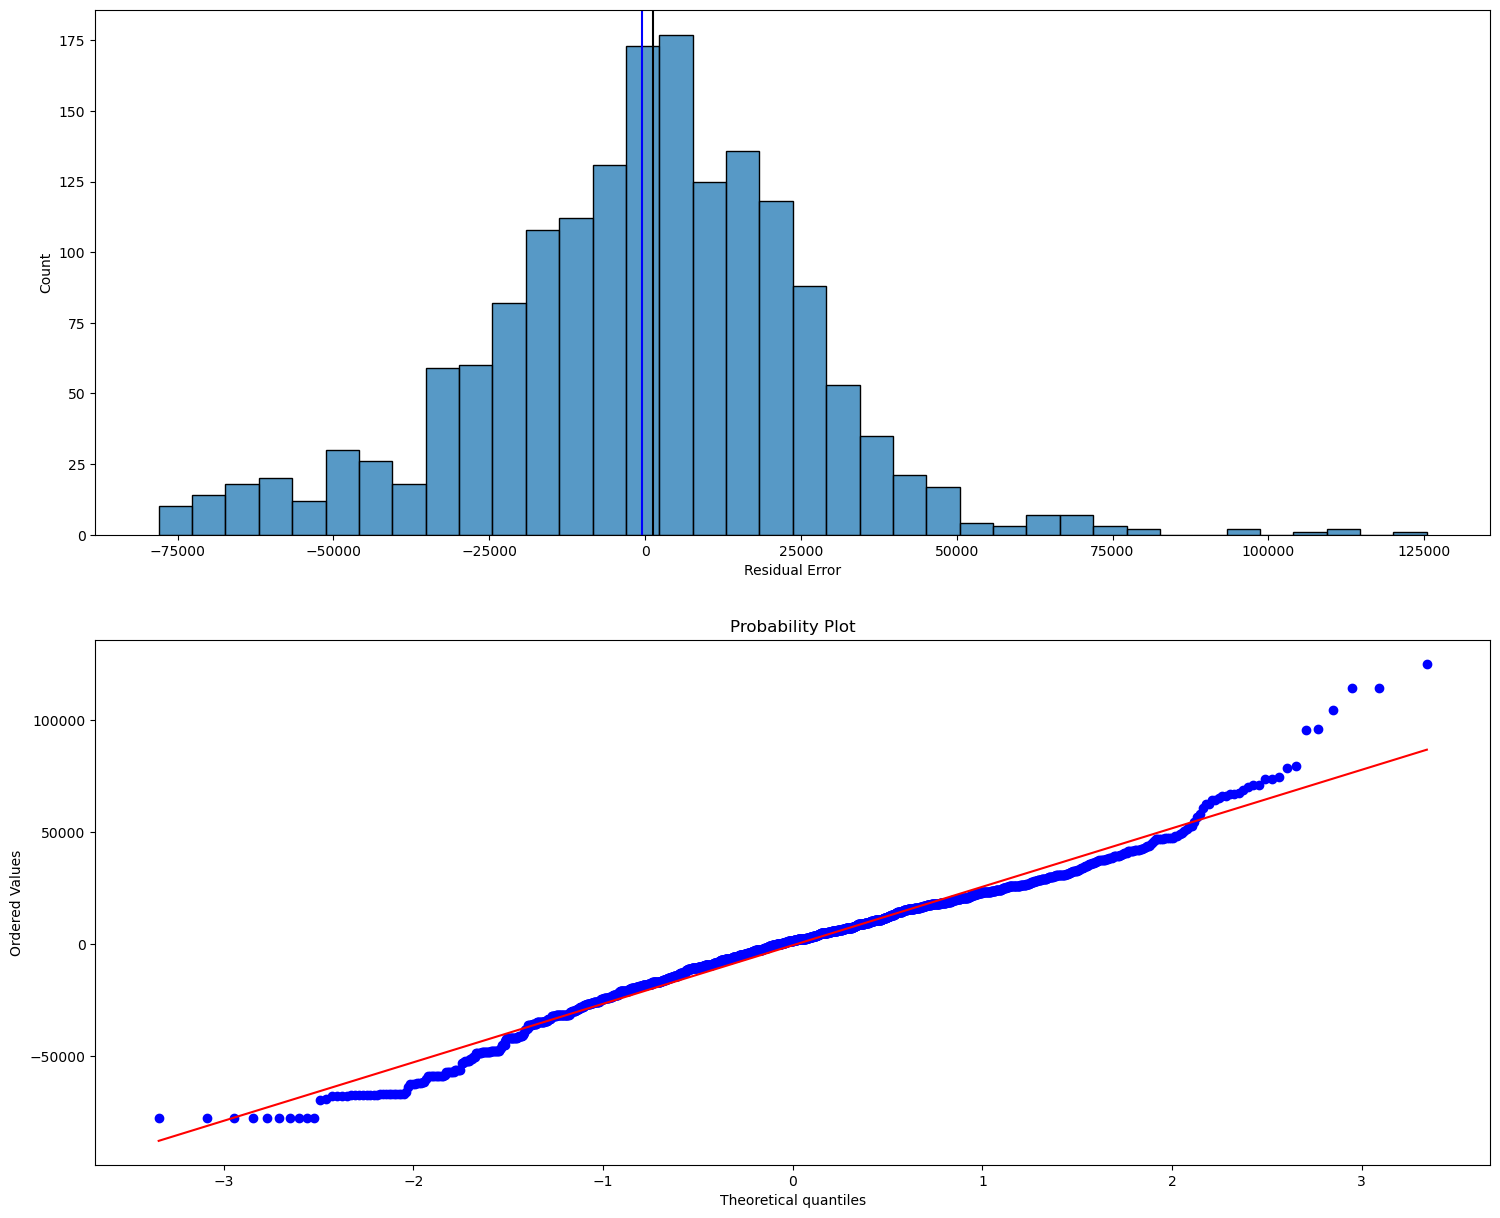

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     1934.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:55:12   Log-Likelihood:                -58213.
No. Observations:                5024   AIC:                         1.164e+05
Df Residuals:                    5015   BIC:                         1.165e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [17]:
def plot_resids(res, model, x_train, y_train): 
    
    cdf_rng = np.linspace(.01, .99,1000)
    
    rv = norm(loc=0, scale=np.std(res))

    fig,ax = plt.subplots(2,1)
    fig.set_size_inches(18, 15)

    #distribution of residuals
    sns.histplot(data=res, ax=ax[0])
    ax[0].set_xlabel("Residual Error")
    ax[0].axvline(x=res.mean(), color="b")
    ax[0].axvline(x=np.median(res),color="k")
    
    #residuals are slightly positively Skewed. Jarque Bera and Probablity Plot indicate residuals are not normally distributed
    
    #probability plot
    probplot(res, plot=plt)
    
    plt.show()
 

       
plot_resids(y_preds.values-y_test.values, model, x_train_encoded, y_train)
print(model.summary())

In [18]:
#Tune Hyper Parameters

#1-drop coefficients less than .05
#All coefficients are significant as observed by p-values less than .05


In [19]:
#2-feature selection
#custom greedy exhaustive feature selection
from sklearn.feature_selection import SequentialFeatureSelector

sfs_scores = dict()

model = LinearRegression()
features = len(x_train_encoded.columns)


for feat in range(features-1):
    
    sfs = SequentialFeatureSelector(model, n_features_to_select=feat+1)
    sfs.fit(x_train_encoded,y_train)
        
    model.fit(x_train_encoded[sfs.get_feature_names_out()], y_train)
    
    sfs_scores[str(sfs.get_feature_names_out())] = mean_absolute_error(
        model.predict(x_test_encoded[sfs.get_feature_names_out()]), y_test)
    

print("Features for the most accurate model: " + min(sfs_scores, key=sfs_scores.get))

scores["Feature Selection"] = min(sfs_scores.values())

print(scores)

Features for the most accurate model: ['Age' 'Job Title' 'Years of Experience' 'Gender_Male'
 'Education Level_High School' "Education Level_Master's Degree"
 'Education Level_PhD']
{'Baseline': 19953.096840527476, 'Feature Selection': 19967.99061567274}


In [20]:
#filter method using statistical tests

features = x_train_encoded.columns.tolist()

kf = KFold(n_splits=10)

model = LinearRegression()

pipeline = Pipeline(steps=[("selector",SelectKBest(score_func=f_regression)), ("model", model)])

model = LinearRegression()

params = {"selector__k":np.arange(1,9,1).tolist()}


gcv = GridSearchCV(pipeline, param_grid=params,cv=kf)



results = gcv.fit(x_train_encoded, y_train)

print(gcv.best_estimator_.named_steps.selector.get_feature_names_out())


['Age' 'Job Title' 'Years of Experience' 'Gender_Male'
 'Education Level_High School' "Education Level_Master's Degree"
 'Education Level_PhD']


In [21]:
#3-frequency encoding features with high cardinality

dict = x_train["Job Title"].value_counts().to_dict()

x_train_freq_enc = x_train.replace({"Job Title": dict})

#replace values in testing data not found in training data with 0
x_test_freq_enc = x_test.copy()
x_test_freq_enc["Job Title"] = x_test_freq_enc["Job Title"].apply(lambda x: x if x in dict.keys() else 0)

x_test_freq_enc = x_test_freq_enc.replace({"Job Title": dict})

#onehot encode
x_train_freq_enc = pd.concat([x_train_freq_enc.reset_index(drop=True), pd.DataFrame(train_encoded, columns=enc.get_feature_names_out(["Gender", "Education Level"])).reset_index(drop=True)], axis=1)
x_test_freq_enc = pd.concat([x_test_freq_enc.reset_index(drop=True), pd.DataFrame(test_encoded, columns=enc.get_feature_names_out(["Gender", "Education Level"])).reset_index(drop=True)], axis=1)


x_train_freq_enc.drop(columns=["Gender", "Education Level"], axis=1, inplace=True)
x_test_freq_enc.drop(columns=["Gender", "Education Level"], axis=1, inplace=True)

print(x_train_freq_enc.dtypes)
print(x_test_freq_enc.dtypes)

Age                                float64
Job Title                            int64
Years of Experience                float64
Gender_Male                        float64
Gender_Other                       float64
Education Level_High School        float64
Education Level_Master's Degree    float64
Education Level_PhD                float64
dtype: object
Age                                float64
Job Title                            int64
Years of Experience                float64
Gender_Male                        float64
Gender_Other                       float64
Education Level_High School        float64
Education Level_Master's Degree    float64
Education Level_PhD                float64
dtype: object


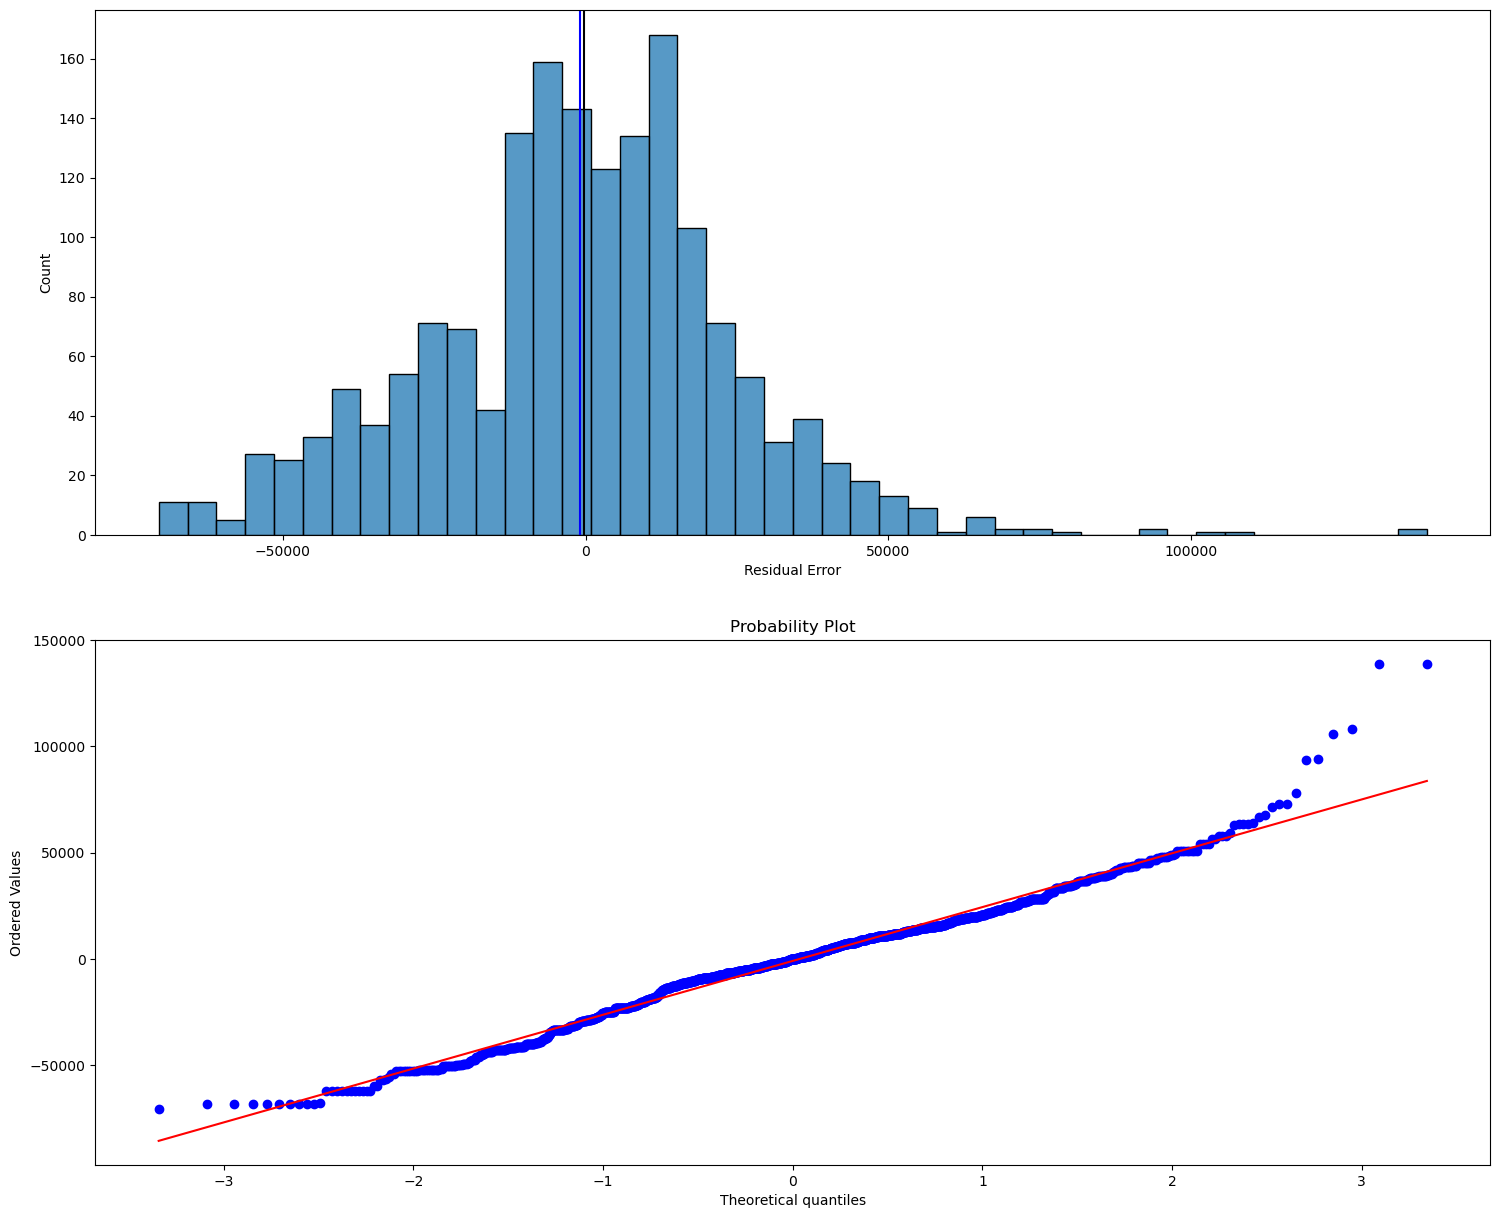

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     2227.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:55:17   Log-Likelihood:                -57941.
No. Observations:                5024   AIC:                         1.159e+05
Df Residuals:                    5015   BIC:                         1.160e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [22]:
#fit model
model = sm.OLS(y_train, sm.add_constant(x_train_freq_enc)).fit()

#insert a column for the intercept coef so statsmodels can compute the dot product
x_test_freq_enc.insert(loc=0, column='const', value=1)

y_preds = model.predict(exog=x_test_freq_enc)

scores["Frequency Encoded"] = mean_absolute_error(y_preds, y_test)

plot_resids(y_preds.values-y_test.values, model, x_train_encoded, y_train)
print(model.summary())

print(scores)

1


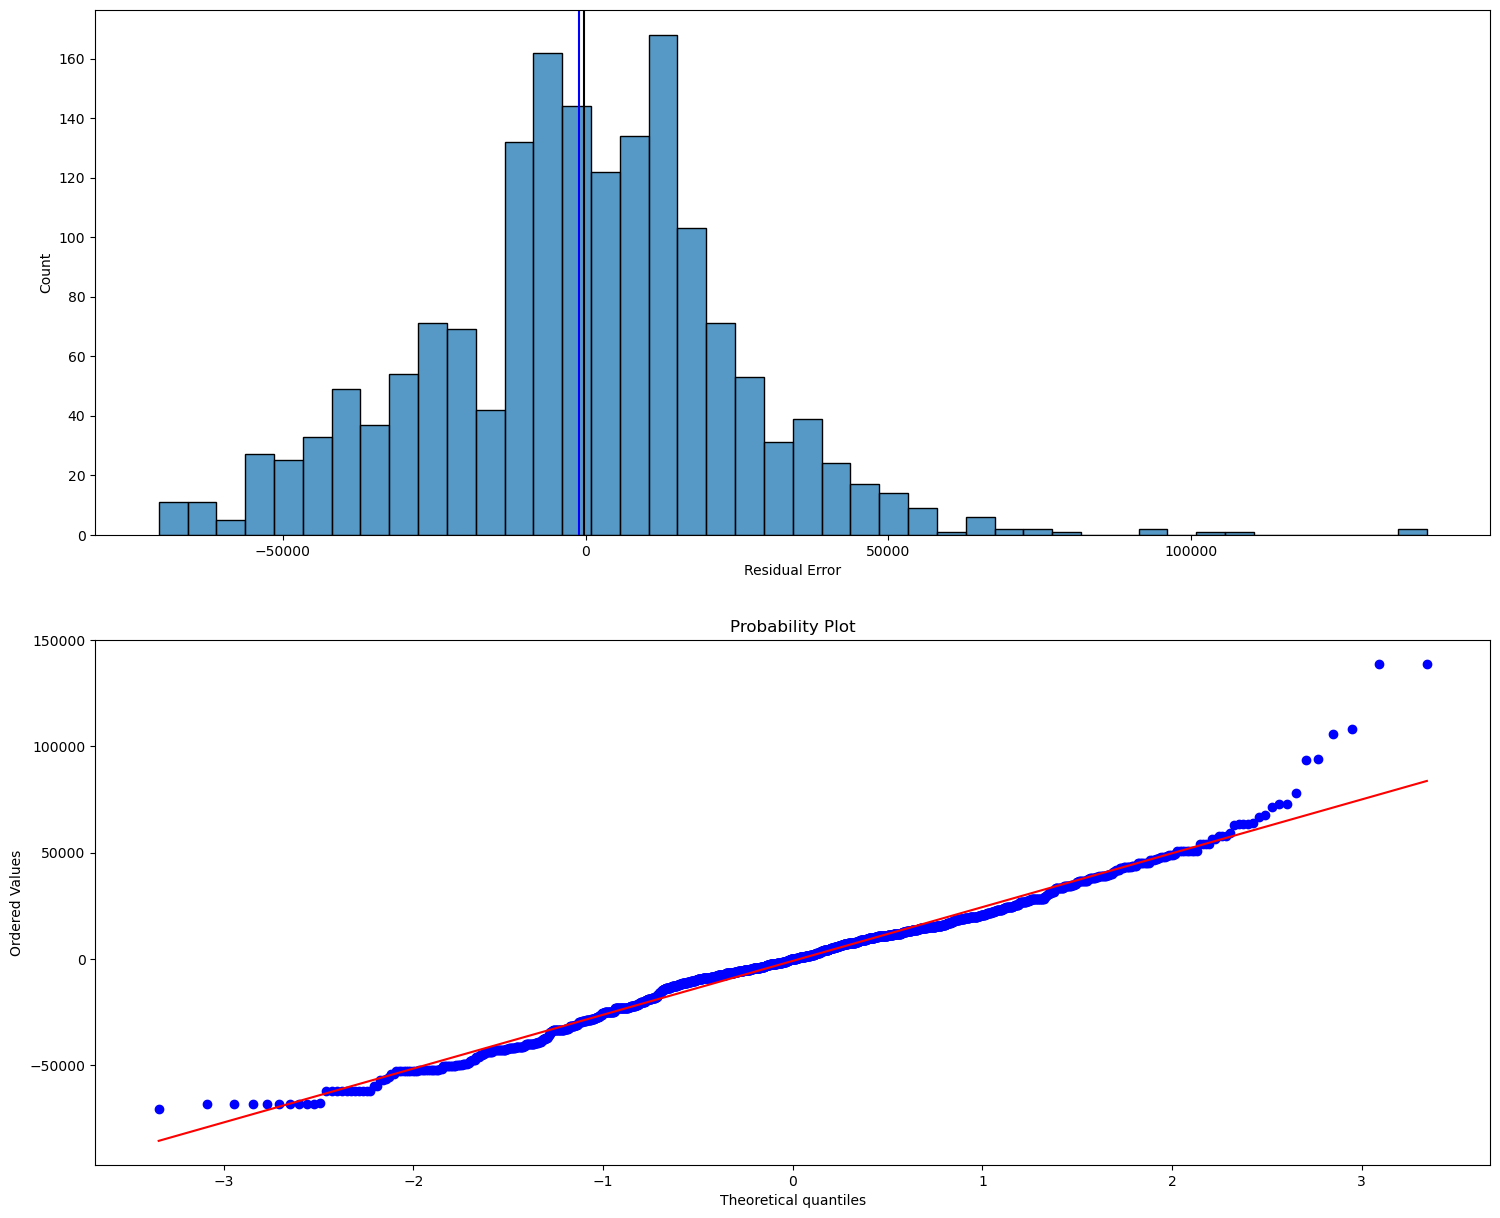

{'Baseline': 19953.096840527476, 'Feature Selection': 19967.99061567274, 'Frequency Encoded': 19411.815316155273, 'Ridge Regression': 19411.822251225163}


In [23]:
#4-models with outlier detection (ridge regression, lasso regression)
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

x_test_freq_enc.drop('const', axis=1, inplace=True)

params = {"alpha":[1, 5, 10, 20]}

model = Ridge()

gcv = GridSearchCV(model,param_grid=params,cv=kf)

gcv.fit(x_train_freq_enc, y_train)

model = Ridge(alpha=gcv.best_params_["alpha"])

print(gcv.best_params_["alpha"])

model.fit(x_train_freq_enc, y_train)

y_preds = model.predict(x_test_freq_enc)

scores["Ridge Regression"] = mean_absolute_error(y_preds, y_test)

plot_resids(y_preds-y_test, model, x_train_freq_enc, y_train)

print(scores)

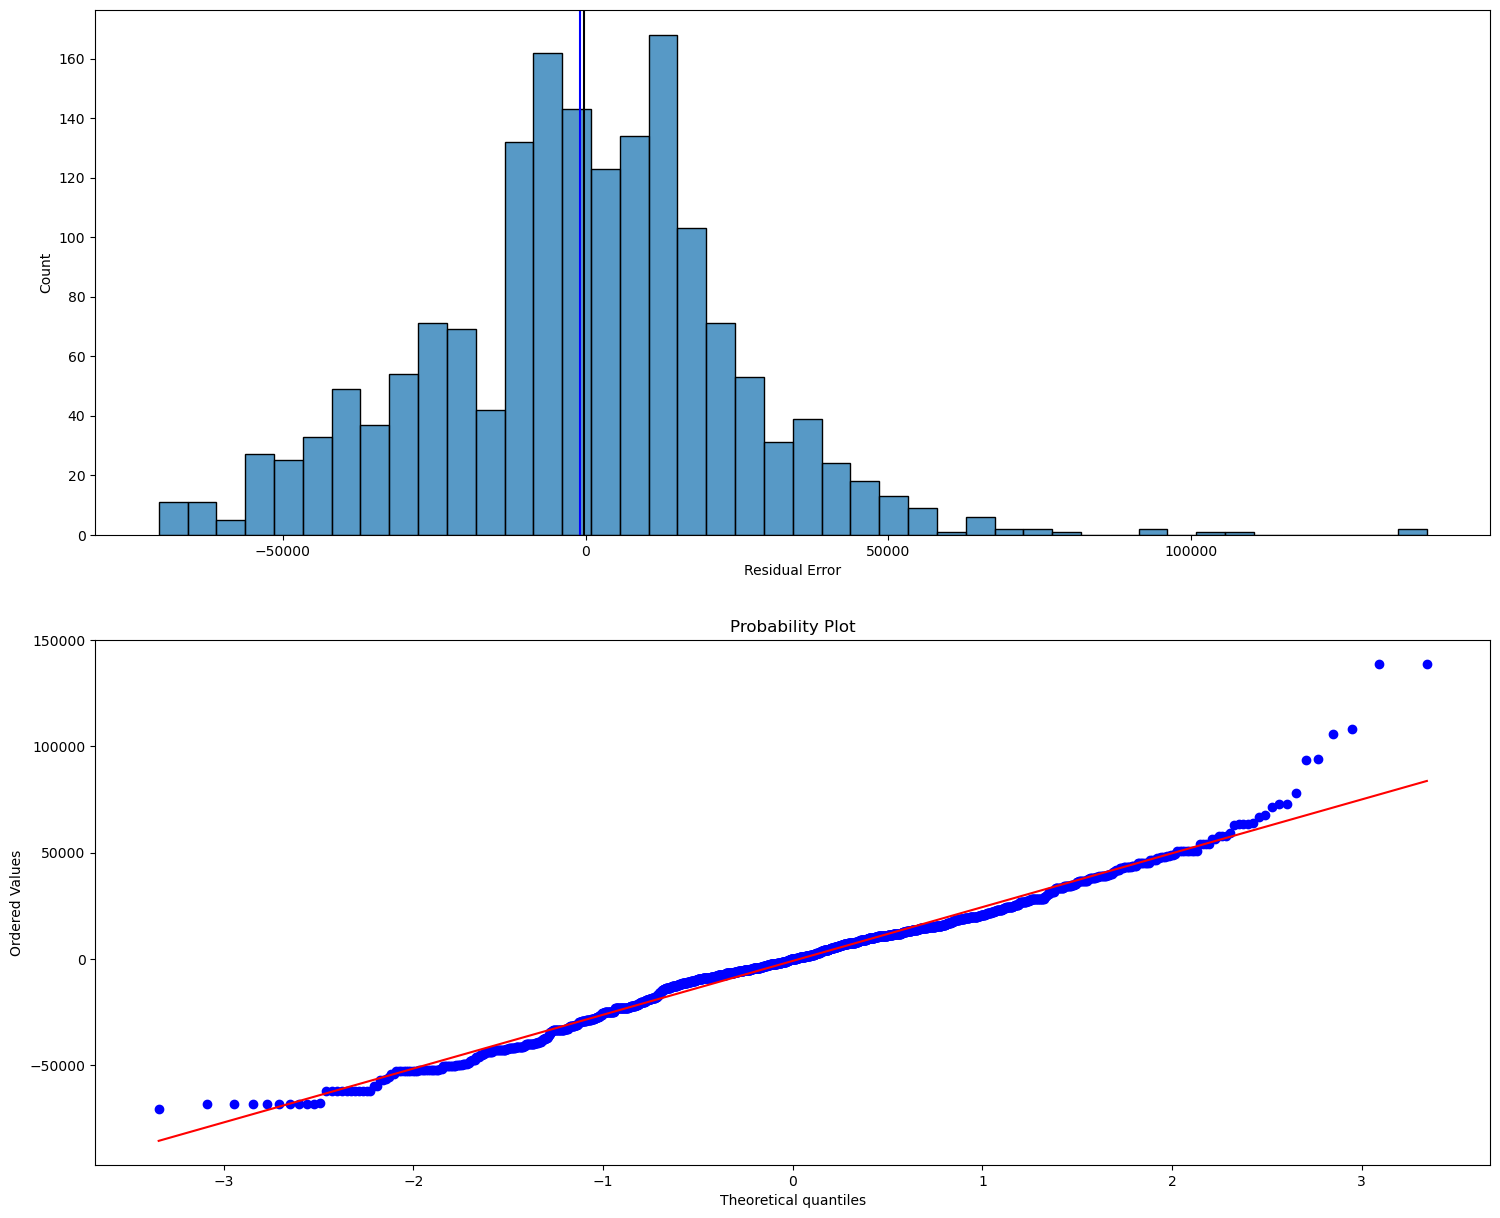

{'Baseline': 19953.096840527476, 'Feature Selection': 19967.99061567274, 'Frequency Encoded': 19411.815316155273, 'Ridge Regression': 19411.822251225163, 'Lasso Regression': 19412.362768842904}


In [24]:
params = {"alpha":[1, 5, 10, 20]}

model = Lasso()

gcv = GridSearchCV(model,param_grid=params,cv=kf)

gcv.fit(x_train_freq_enc, y_train)

model = Lasso(alpha=gcv.best_params_["alpha"])

model.fit(x_train_freq_enc, y_train)

y_preds = model.predict(x_test_freq_enc)

scores["Lasso Regression"] = mean_absolute_error(y_preds, y_test)

plot_resids(y_preds-y_test, model, x_train_freq_enc, y_train)

print(scores)

C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterati

C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterati

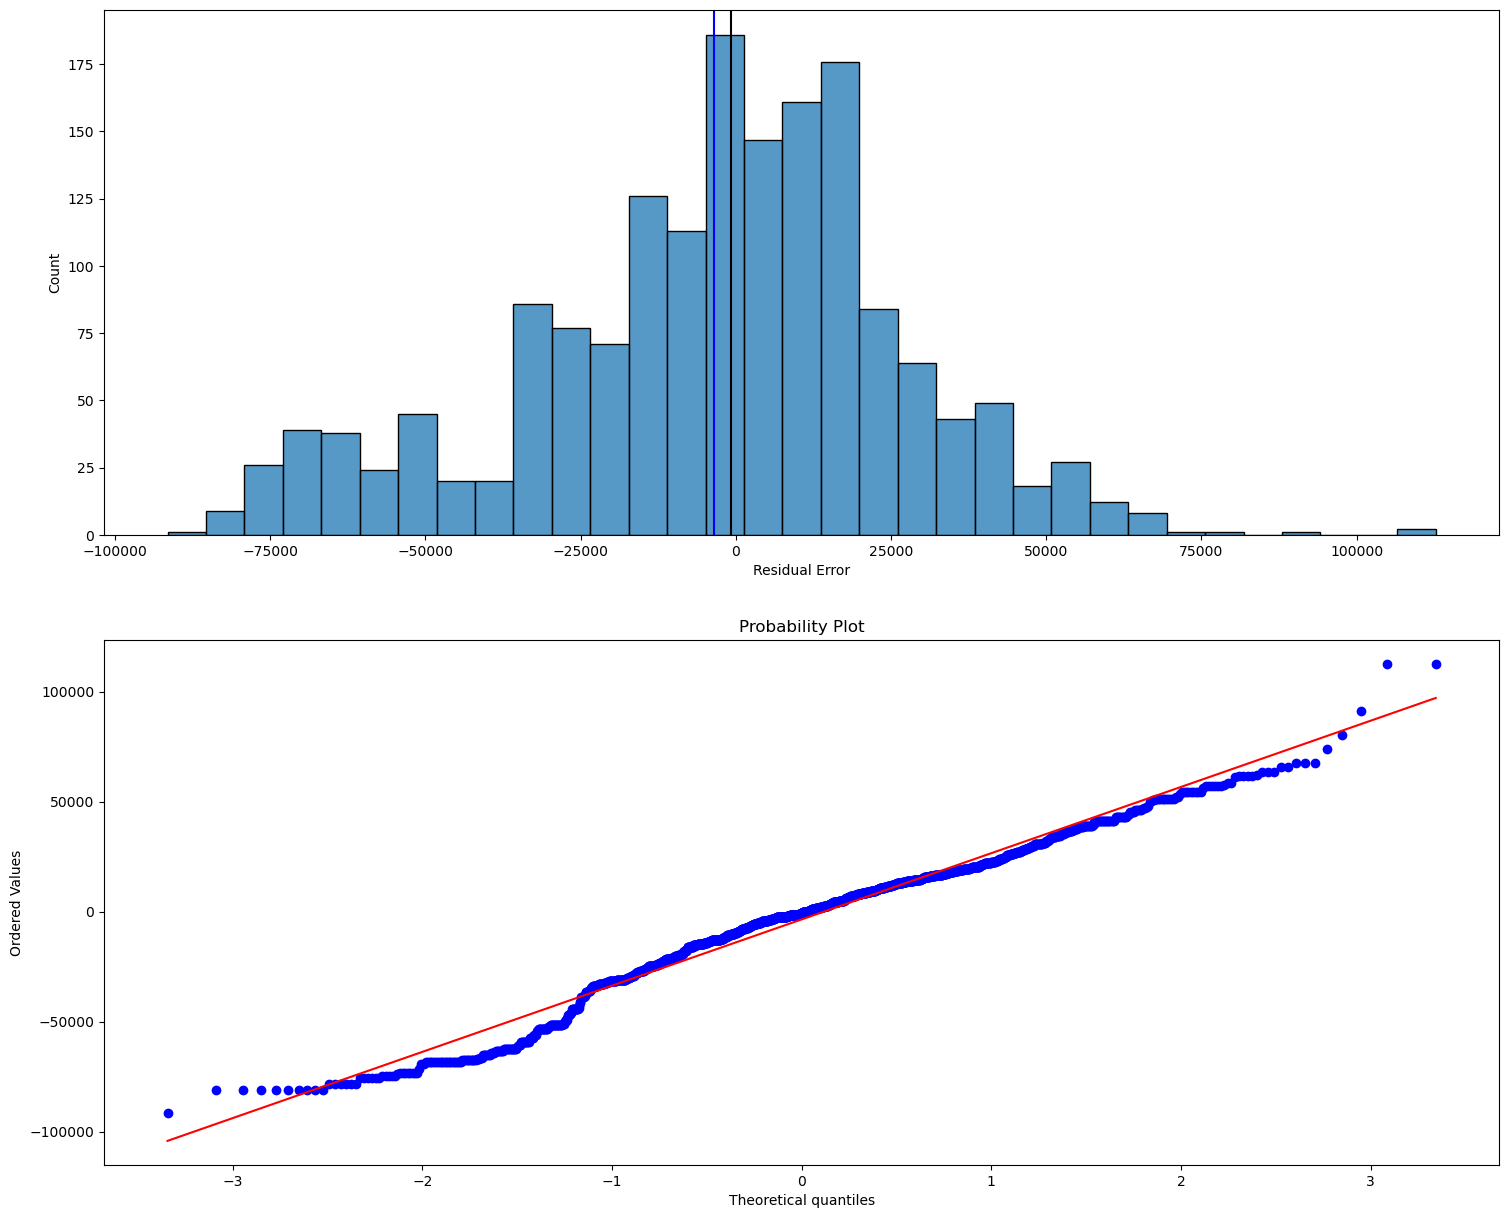

{'Baseline': 19953.096840527476, 'Feature Selection': 19967.99061567274, 'Frequency Encoded': 19411.815316155273, 'Ridge Regression': 19411.822251225163, 'Lasso Regression': 19412.362768842904, 'Huber Regression': 23284.303793434323}


In [25]:
#5 Huber loss to minimize effect of outliers
from sklearn.linear_model import HuberRegressor
params = {"epsilon":[.5, 1, 2, 3]}

model = HuberRegressor(max_iter=100)

gcv = GridSearchCV(model,param_grid=params,cv=kf)

gcv.fit(x_train_freq_enc, y_train)

model = HuberRegressor(alpha=gcv.best_params_["epsilon"])

model.fit(x_train_freq_enc, y_train)

y_preds = model.predict(x_test_freq_enc)

scores["Huber Regression"] = mean_absolute_error(y_preds, y_test)

plot_resids(y_preds-y_test, model, x_train_freq_enc, y_train)

print(scores)

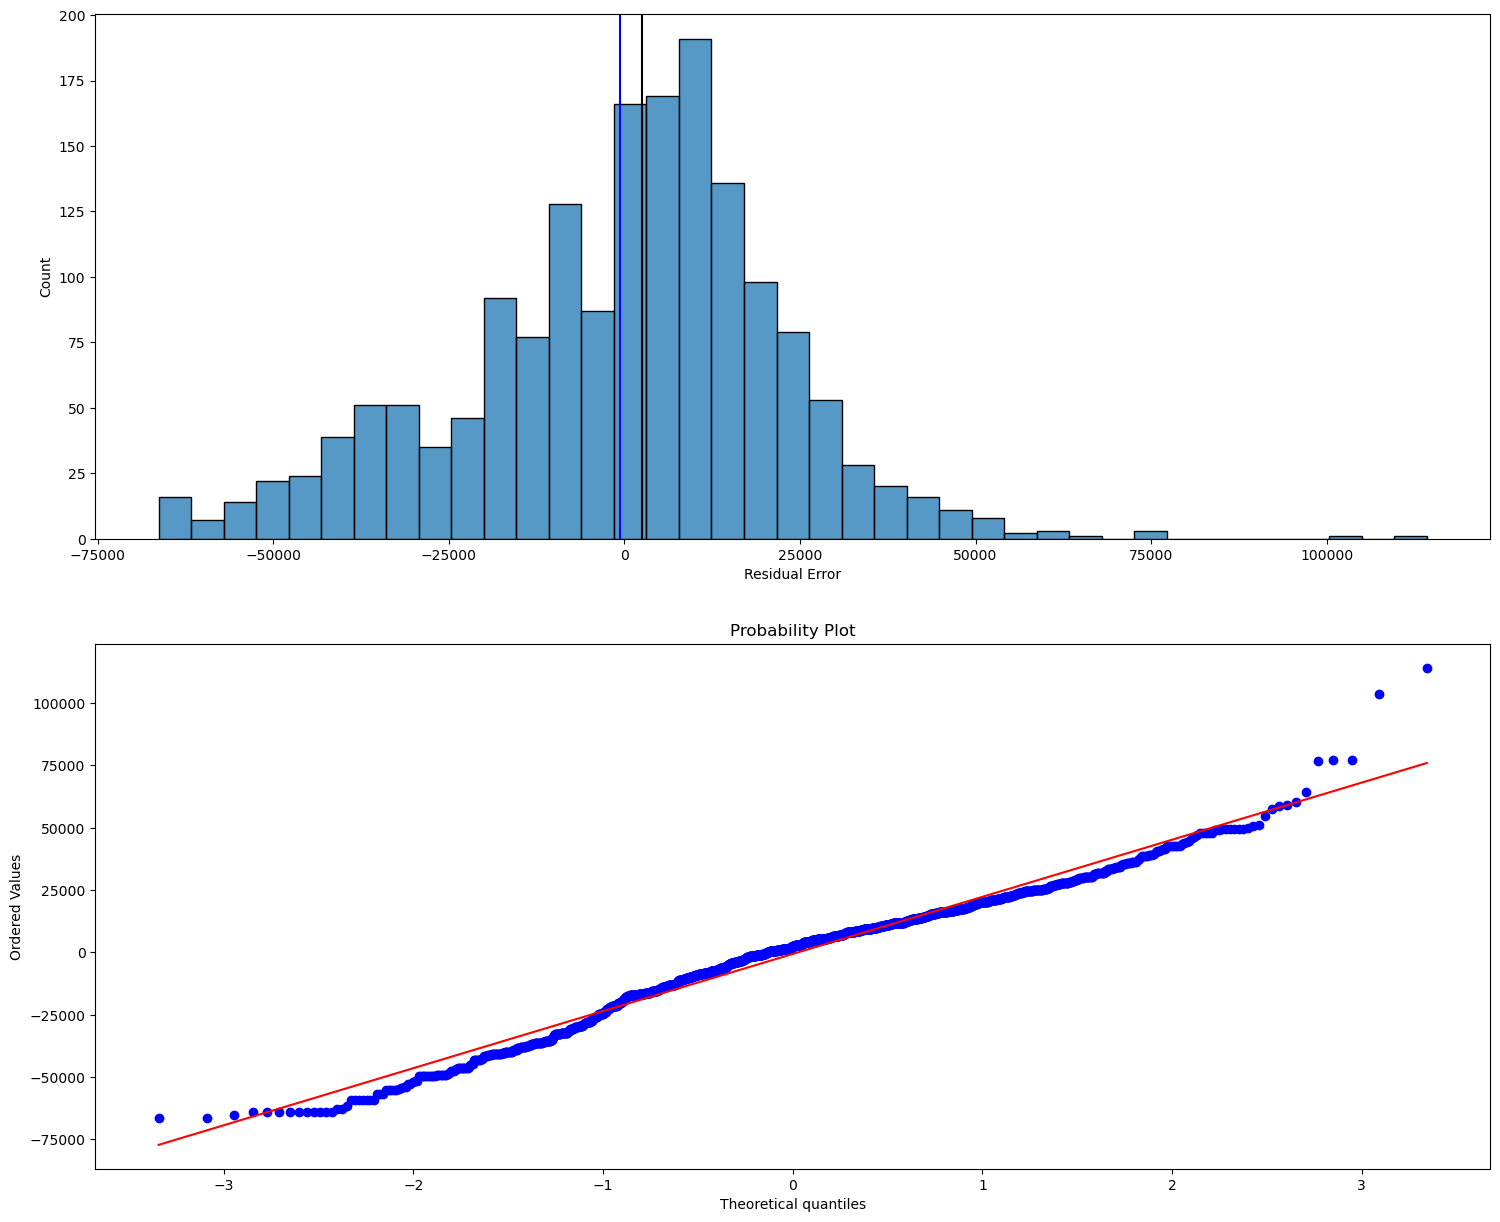

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     2006.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:55:29   Log-Likelihood:                -57512.
No. Observations:                5024   AIC:                         1.150e+05
Df Residuals:                    5012   BIC:                         1.151e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [26]:
#Interpret

#6-interaction effect, multicolinear columns only 
from sklearn.preprocessing import PolynomialFeatures

trans = PolynomialFeatures(interaction_only=True, include_bias=False)
data_train = pd.DataFrame(trans.fit_transform(x_train_encoded[["Age", "Job Title", "Years of Experience"]]), columns=trans.get_feature_names_out(x_train_encoded[["Age", "Job Title", "Years of Experience"]].columns))
data_test = pd.DataFrame(trans.transform(x_test_encoded[["Age", "Job Title", "Years of Experience"]]), columns=trans.get_feature_names_out(x_test_encoded[["Age", "Job Title", "Years of Experience"]].columns))


data_train.drop(columns=["Age", "Job Title", "Years of Experience"], inplace=True)
data_test.drop(columns=["Age", "Job Title", "Years of Experience"], inplace=True)


x_train_inter = pd.concat([x_train_encoded.reset_index(drop=True), data_train.reset_index(drop=True)], axis=1)
x_test_inter = pd.concat([x_test_encoded.reset_index(drop=True),data_test.reset_index(drop=True)], axis=1)

model = sm.OLS(y_train, sm.add_constant(x_train_inter)).fit()

y_preds = model.predict(exog=x_test_inter)

scores["Interaction Effect Model"] = mean_absolute_error(y_preds, y_test)

plot_resids(y_preds.values-y_test.values, model, x_train_encoded, y_train)
print(model.summary())

print(scores)


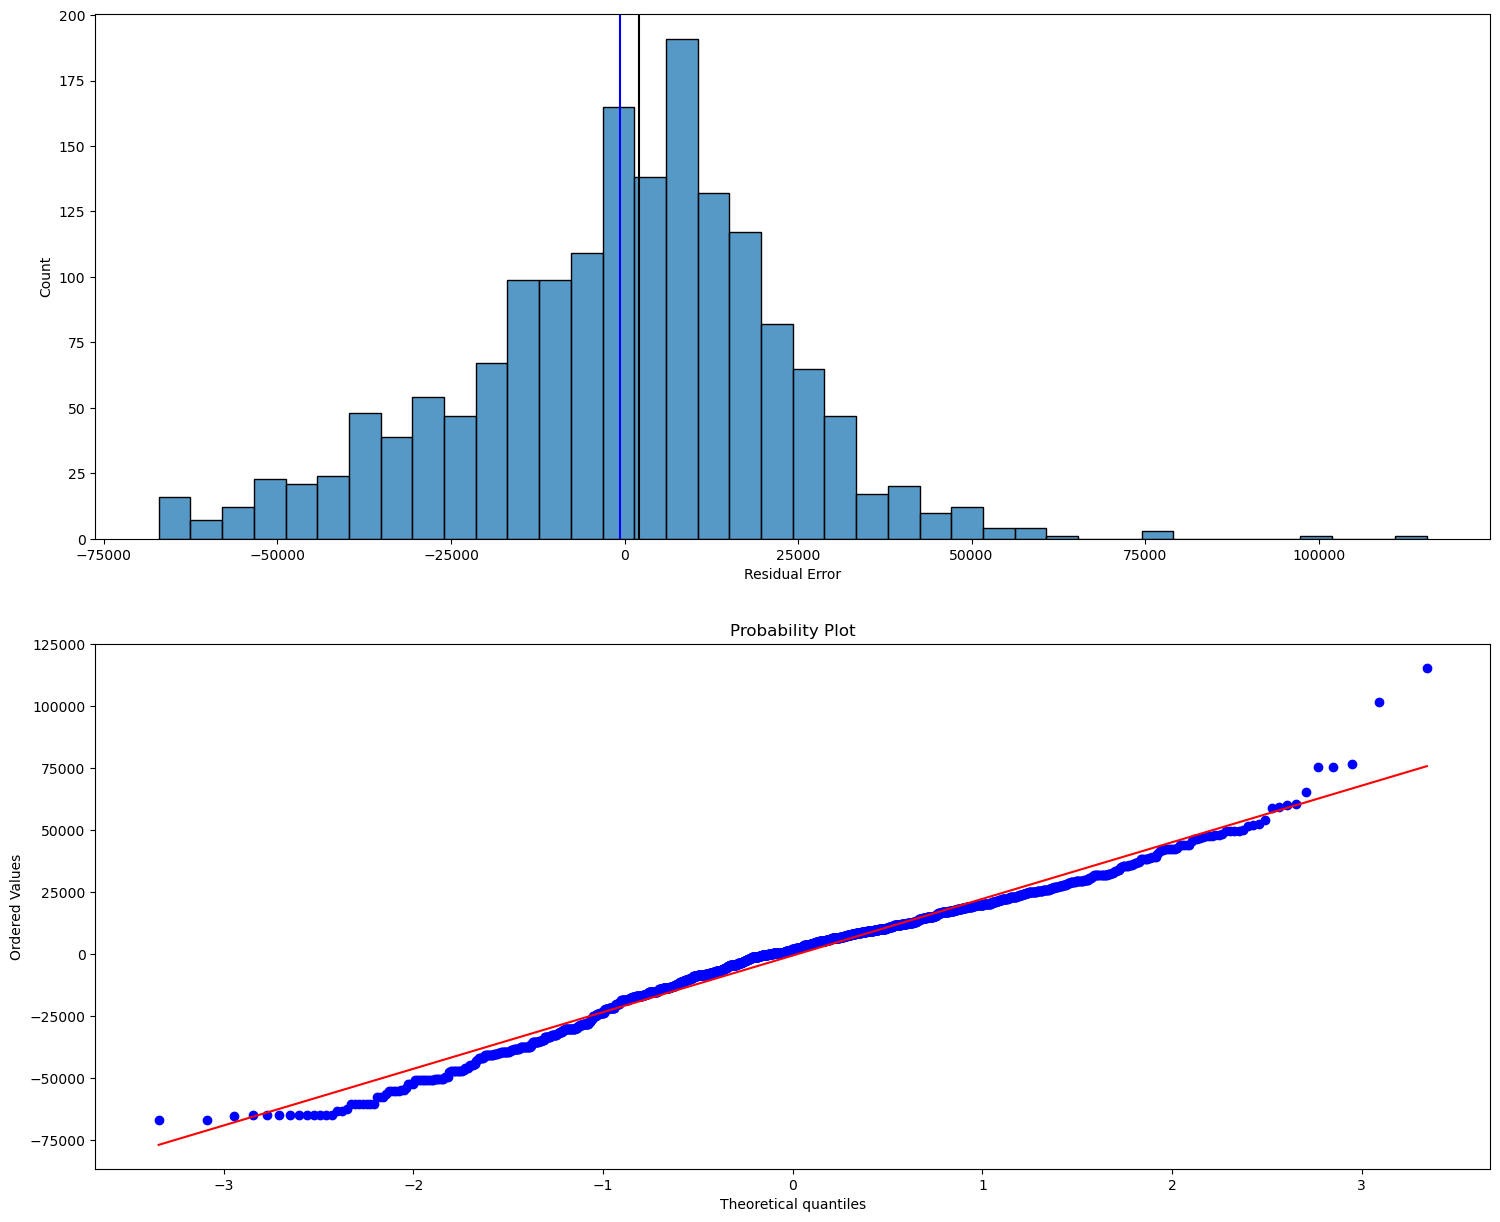

{'Baseline': 19953.096840527476, 'Feature Selection': 19967.99061567274, 'Frequency Encoded': 19411.815316155273, 'Ridge Regression': 19411.822251225163, 'Lasso Regression': 19412.362768842904, 'Huber Regression': 23284.303793434323, 'Interaction Effect Model': 17807.331117934504, 'Ridge Regression with Interaction Effect': 17678.565623249815}


In [27]:
x_test_inter.drop('const', axis=1, inplace=True)

final_model = Ridge()

final_model = Ridge(alpha=5)

final_model.fit(x_train_inter, y_train)

y_preds = final_model.predict(x_test_inter)

scores["Ridge Regression with Interaction Effect"] = mean_absolute_error(y_preds, y_test)

plot_resids(y_preds-y_test, model, x_train_inter, y_train)

print(scores)

final_train_data = x_train_inter.copy()
final_test_data = x_test_inter.copy()

#The Model with interactiont terms and ridge regression had the best performance 
#combining terms and adding ridge regression reduced multicolinierity
#residuals are still not normally distributed so interpretation of the coefficients is marginally innaccurate 

       Age  Gender    Education Level      Job Title  Years of Experience  \
0     31.0    Male    Master's Degree  127376.898350                  9.0   
1     29.0  Female        High School  108909.840971                  1.0   
2     33.0    Male  Bachelor's Degree  113887.179914                  7.0   
3     28.0  Female  Bachelor's Degree  111255.358312                  3.0   
4     32.0  Female    Master's Degree  115103.196492                  6.0   
...    ...     ...                ...            ...                  ...   
5019  38.0  Female    Master's Degree  115668.169997                 10.0   
5020  26.0  Female  Bachelor's Degree  116946.127499                  3.0   
5021  36.0    Male                PhD  116193.120167                 12.0   
5022  33.0    Male    Master's Degree  116722.126507                  8.0   
5023  25.0  Female  Bachelor's Degree  116860.858433                  2.0   

      Gender_Female  Gender_Male  Gender_Other  \
0               0.0      

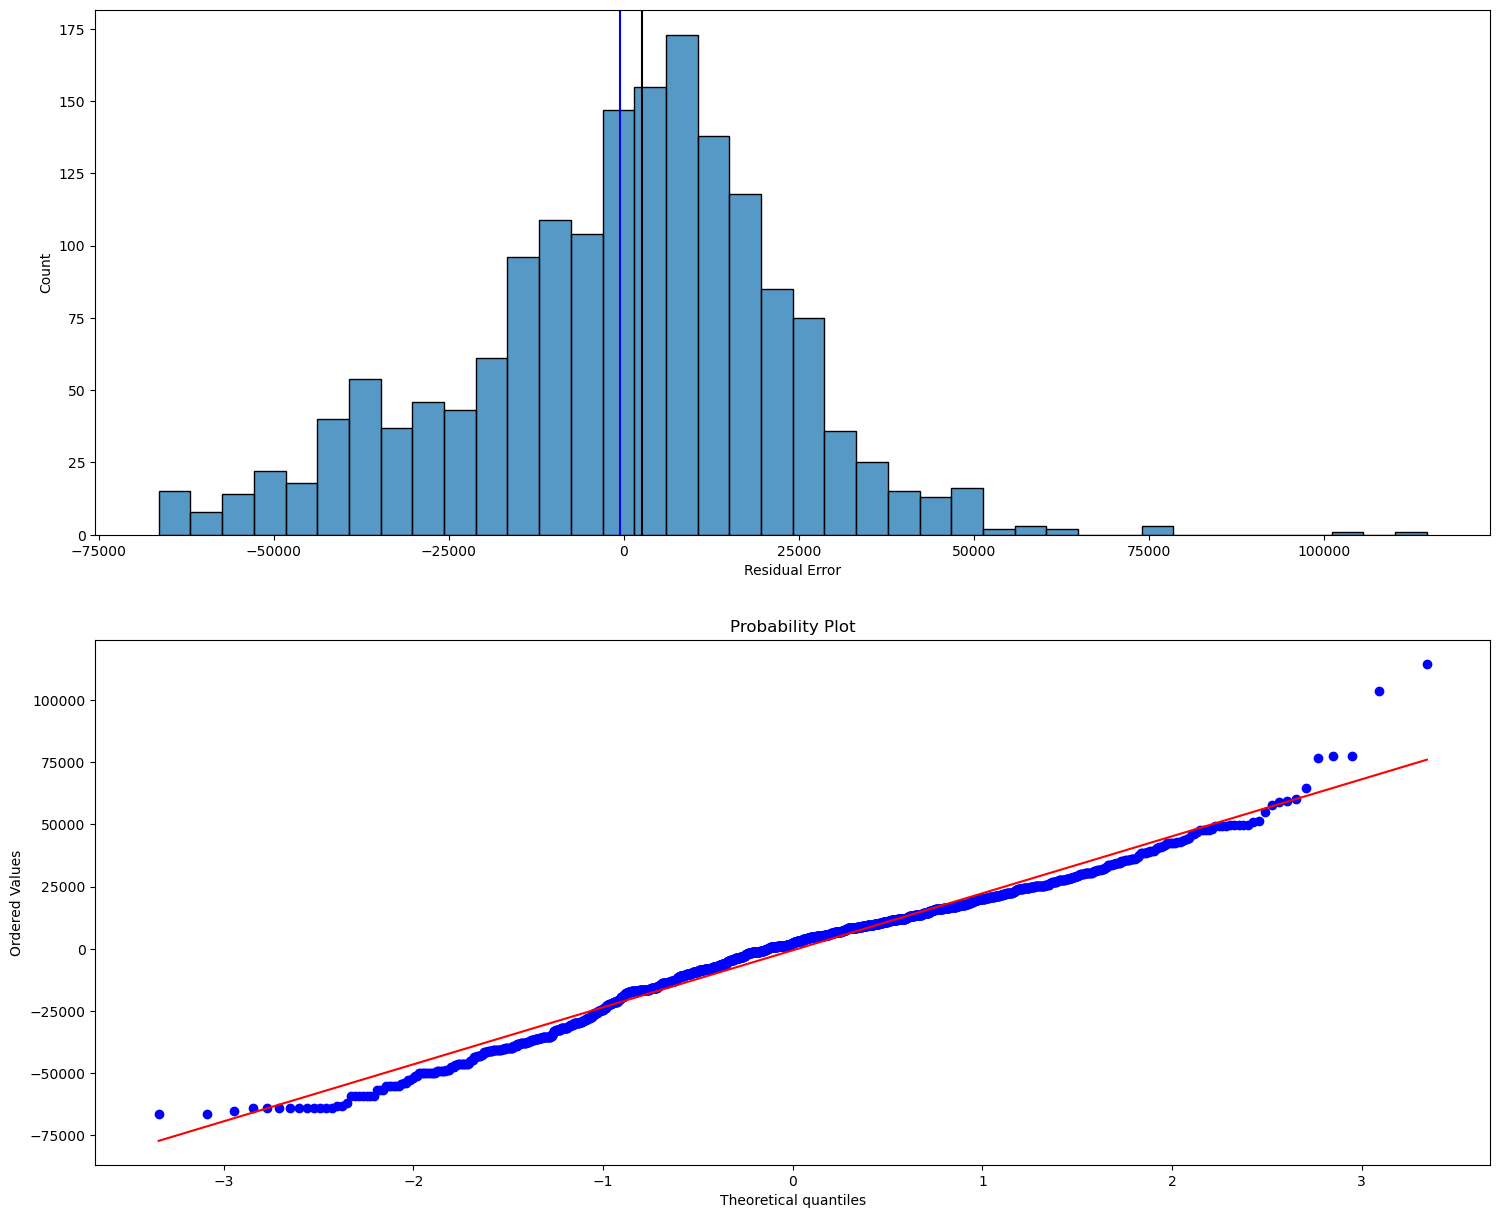

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     2009.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:55:30   Log-Likelihood:                -57508.
No. Observations:                5024   AIC:                         1.150e+05
Df Residuals:                    5012   BIC:                         1.151e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [28]:
#Observe effect of variabels that were dropped from the initial models to avoid multicolinierit-Female and Bachelor's Degree
encoder = TargetEncoder(smooth=1000, target_type='continuous')

x_train["Job Title"] = encoder.fit_transform(x_train[["Job Title"]], y_train)
x_test["Job Title"] = encoder.transform(x_test[["Job Title"]])

enc = OneHotEncoder(handle_unknown = 'ignore',sparse_output=False)

x_train_drops_added = enc.fit_transform(x_train[["Gender", "Education Level"]])
x_test_drops_added = enc.transform(x_test[["Gender", "Education Level"]])


x_train_encoded_drops_added = pd.concat([x_train.reset_index(drop=True), pd.DataFrame(x_train_drops_added, columns=enc.get_feature_names_out(["Gender", "Education Level"])).reset_index(drop=True)], axis=1)
x_test_encoded_drops_added = pd.concat([x_test.reset_index(drop=True), pd.DataFrame(x_test_drops_added, columns=enc.get_feature_names_out(["Gender", "Education Level"])).reset_index(drop=True)], axis=1)

x_train_encoded_drops_added.drop(columns=["Gender_Male", "Education Level_High School", "Education Level", "Gender"], inplace=True)
x_test_encoded_drops_added.drop(columns=["Gender_Male", "Education Level_High School","Education Level", "Gender"], inplace=True)



trans = PolynomialFeatures(interaction_only=True, include_bias=False)
data_train = pd.DataFrame(trans.fit_transform(x_train_encoded_drops_added[["Age", "Job Title", "Years of Experience"]]), columns=trans.get_feature_names_out(x_train_encoded_drops_added[["Age", "Job Title", "Years of Experience"]].columns))
data_test = pd.DataFrame(trans.transform(x_test_encoded_drops_added[["Age", "Job Title", "Years of Experience"]]), columns=trans.get_feature_names_out(x_test_encoded_drops_added[["Age", "Job Title", "Years of Experience"]].columns))


data_train.drop(columns=["Age", "Job Title", "Years of Experience"], inplace=True)
data_test.drop(columns=["Age", "Job Title", "Years of Experience"], inplace=True)


x_train_inter_drops_added = pd.concat([x_train_encoded_drops_added.reset_index(drop=True), data_train.reset_index(drop=True)], axis=1)
x_test_inter_drops_added = pd.concat([x_test_encoded_drops_added.reset_index(drop=True),data_test.reset_index(drop=True)], axis=1)

x_test_inter_drops_added.insert(loc=0, column='const', value=1)

model = sm.OLS(y_train, sm.add_constant(x_train_inter_drops_added)).fit()

y_preds = model.predict(exog=x_test_inter_drops_added)

plot_resids(y_preds.values-y_test.values, model, x_train_encoded, y_train)
print(model.summary())

In [29]:
#feature importance

#permutation feature importance 
from sklearn.inspection import permutation_importance

result = permutation_importance(final_model, final_test_data, y_test,n_repeats=30,random_state=0)

for i in range(len(result.importances_mean)):
    print(f"Feature {final_test_data.columns[i]}: {result.importances_mean[i]}")


Feature Age: 91.33304655941308
Feature Job Title: 0.5175332202826051
Feature Years of Experience: 215.57659579578174
Feature Gender_Male: 0.0008574195190071261
Feature Gender_Other: 7.677745105661253e-05
Feature Education Level_High School: 0.0031419687216383994
Feature Education Level_Master's Degree: 0.0004766749981801747
Feature Education Level_PhD: -0.000284613143114724
Feature Age Job Title: 112.09675699383436
Feature Age Years of Experience: 1.8171676278691904
Feature Job Title Years of Experience: 165.44249575282063


In [30]:
#analyzing coefficients for feature importance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


final_train_data = pd.DataFrame(scaler.fit_transform(final_train_data), columns=final_train_data.columns)
final_test_data = pd.DataFrame(scaler.transform(final_test_data), columns=final_test_data.columns)

final_test_data.insert(loc=0, column='const', value=1)


model = sm.OLS(y_train, sm.add_constant(final_train_data)).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     2006.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:55:32   Log-Likelihood:                -57512.
No. Observations:                5024   AIC:                         1.150e+05
Df Residuals:                    5012   BIC:                         1.151e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [31]:
#Best fit Model - Ridge Regression with Interaction Affect 
#Most important features - Years of Experiance, Age/Years of Experiance, Age